# Análisis de los 25 retailers más grandes de Estados Unidos

In [1]:
# Importar librerías aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importar datos aquí
df = pd.read_csv("./data/largest_us_retailers.csv")
df.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


In [3]:
mean_total_sales = df["Sales"].mean()
mean_total_stores = df["Stores"].mean()

In [4]:
df.columns

Index(['Company', 'Sales', 'Stores', 'Sales/Avg. Store', 'Store Count Growth',
       'Category'],
      dtype='object')

Descripción de las columnas del dataset:

* Company (compañía)
* Sales (ventas en millones de dólares)
* Stores (cantidad de tiendas físicas)
* Sales/Avg. Store (promedio de venta por tienda física)
* Store Count Growth (Crecimiento de cantidad de tiendas)
* Category (categoría)

In [5]:
df['Category']

0              Supercenters
1                   Grocery
2            Warehouse Club
3          Home Improvement
4               Drug Stores
5               Drug Stores
6     Electronic/Mail Order
7              Supercenters
8          Home Improvement
9                   Grocery
10          Warehouse Clubs
11                      NaN
12              Electronics
13                  Grocery
14              Drug Stores
15                  Grocery
16        Department Stores
17                  Apparel
18                  Grocery
19            Dollar Stores
20            Dollar Stores
21                  Grocery
22        Department Stores
23                  Grocery
24             Supercenters
Name: Category, dtype: object

## Pregunta cero - ¿cuál empresa vendió más?



In [6]:
df_sorted = df.sort_values('Sales', ascending=0)
df_sorted

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


In [7]:
x = df_sorted['Company'][0:5]
y = df_sorted['Sales'][0:5]

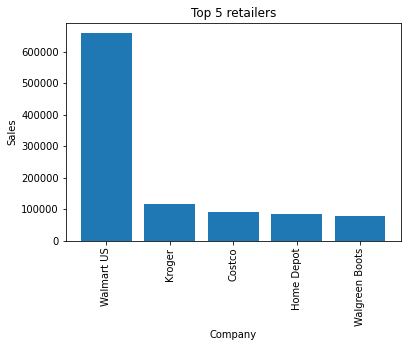

In [8]:
plt.bar(x, y)
plt.title('Top 5 retailers')
plt.xlabel('Company')
plt.ylabel('Sales')
plt.xticks(rotation='vertical') #Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.show()

Aspectos a destacar:
* <b>Walmart US</b> es la compañía que más ventas generó. Supera por 5 veces a Kroger que se encuentra en la segunda posición.
* Las 4 compañías que siguen a Walmart US tienen ventas similares. Competir directamente contra Walmart US puede no ser la mejor opción por su posición dominante.

## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

In [9]:
df_without_walmart = df_sorted[1:]
mean_without_walmart = df_without_walmart["Sales"].mean()

print("Promedio de ventas sin Walmart US:",mean_without_walmart, " Millones de dolares")

Promedio de ventas sin Walmart US: 46602.416666666664  Millones de dolares


In [10]:
df_without_walmart

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs


In [11]:
x = df_without_walmart['Company']
y = df_without_walmart['Sales']

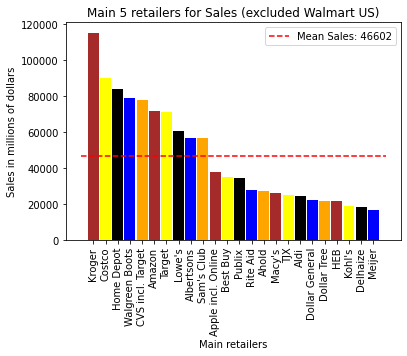

In [12]:
plt.bar(x, y,width = 0.9,color=['brown', 'yellow', 'black', 'blue', 'orange'])
plt.title('Main 5 retailers for Sales (excluded Walmart US)')
plt.xlabel('Main retailers')
plt.ylabel('Sales in millions of dollars')
plt.xticks(rotation='vertical') 
plt.hlines(mean_without_walmart, xmin=-1, xmax=24,color='red', linestyles='dashed',label=f'Mean Sales: {int(mean_without_walmart)}')
plt.legend()
plt.show()

Aspectos a destacar:
* El promedio en ventas sin contar a walmart Us es de: <b>46602</b>. 
* En la gráfica se muestra las cinco compañías con más ventas sin contar a Walmart US.
* Las compañías que superan el promedio de ventas son ( en orden de ventas):
    * Kroger
    * Costco
    * Home Depot
    * Walgreen Boots
    * CVS incl. Target
    * Amazon
    * Target
    * Lowe's
    * Albertsons
    * Sam's Club

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

#### Cálculo de bins método Freedman-Diaconis

In [13]:
df_sales = df['Sales']
mean_sales = df_sales.mean()
q1_sales = df_sales.quantile(0.25)
q3_sales = df_sales.quantile(0.75)
iqr_sales = q3_sales - q1_sales 
bin_width_sales = (2 * iqr_sales) / (len(df_sales) ** (1 / 3))
bin_count_sales = int(np.ceil((df_sales.max() - df_sales.min()) / bin_width_sales))
print("Mean:",mean_sales)
print("Q3: ",q3_sales)
print("Bins:",bin_count_sales)


Mean: 71063.08
Q3:  71687.0
Bins: 20


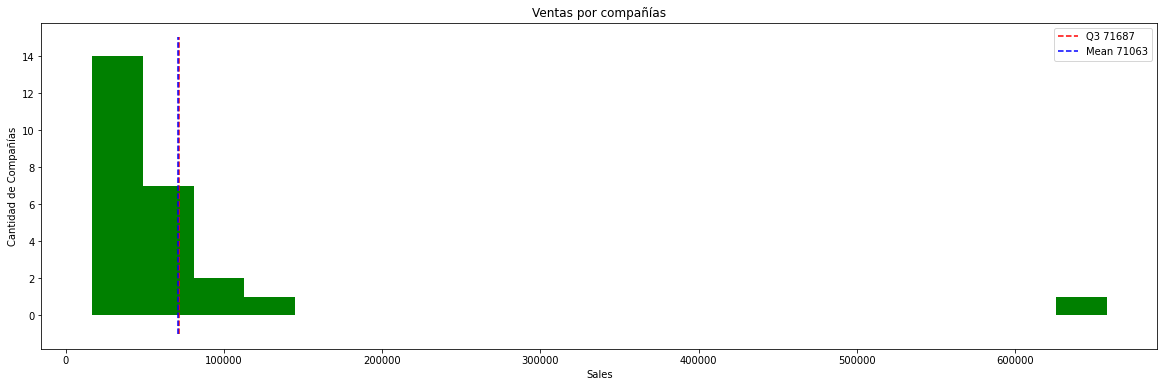

In [14]:

# Plot
plt.figure(figsize=[20, 6]) 
plt.hist(df_sales, bins=bin_count_sales,color='green')
plt.vlines(q3_sales, ymin=-1, ymax=15,color='red', linestyles='dashed',label=f'Q3 {int(q3_sales)}')
plt.vlines(mean_sales, ymin=-1, ymax=15,color='blue', linestyles='dashed',label=f'Mean {int(mean_sales)}')
plt.legend()
plt.title('Ventas por compañías')
plt.xlabel('Sales')
plt.ylabel('Cantidad de Compañías')
plt.show()

Aspectos a destacar:

* La mayoría de las compañías tiene que cumplir que estén por arriba del Quartile 3 (75%) que es <b>71687 millones de doláres</b>.
* Son 21 de las 25 empresas las que cumplen las ventas menores a <b>71687 millones de doláres</b>. 
* El resto de las compañías (4) tienen ventas mayores a <b>71687 millones de doláres</b>.


### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

#### Cálculo de bins método Freedman-Diaconis

In [15]:
df_stores = df['Stores']
mean_stores = df_stores.mean()
q1_stores = df_stores.quantile(0.25)
q3_stores = df_stores.quantile(0.75)
iqr_stores = q3_stores - q1_stores 
bin_width_stores = (2 * iqr_stores) / (len(df_stores) ** (1 / 3))
bin_count_stores = int(np.ceil((df_stores.max() - df_stores.min()) / bin_width_stores))
print("Q3:",q3_stores)
print("Bins:",bin_count_stores)
print("Mean:",mean_stores)

Q3: 4242.0
Bins: 7
Mean: 3466.5652173913045


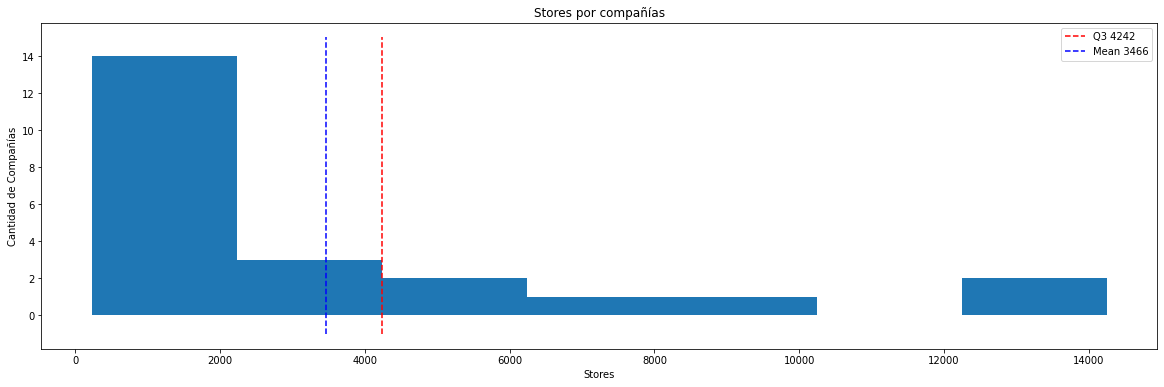

In [16]:

# Plot
plt.figure(figsize=[20, 6]) # 7 in de ancho y 6 in de alto
plt.hist(df_stores, bins=bin_count_stores)
plt.vlines(q3_stores, ymin=-1, ymax=15,color='red', linestyles='dashed',label=f'Q3 {int(q3_stores)}')
plt.vlines(mean_stores, ymin=-1, ymax=15,color='blue', linestyles='dashed',label=f'Mean {int(mean_stores)}')
plt.legend()
plt.title('Stores por compañías')
plt.xlabel('Stores')
plt.ylabel('Cantidad de Compañías')
plt.show()

Aspectos a destacar:

* La mayoría de las compañías tiene que cumplir que estén por arriba del Quartile 3 (75%) que es <b>4242 tiendas</b>.
* Son 17 de 25 compañías que tienen menos de <b>4242 tiendas </b>. 
* El resto de las compañías (8) tienen más de 4242 tiendas.


### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

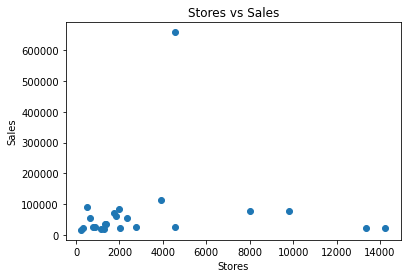

In [17]:
plt.scatter(df["Stores"], df["Sales"])
plt.title('Stores vs Sales')
plt.xlabel('Stores')
plt.ylabel('Sales')
plt.show()

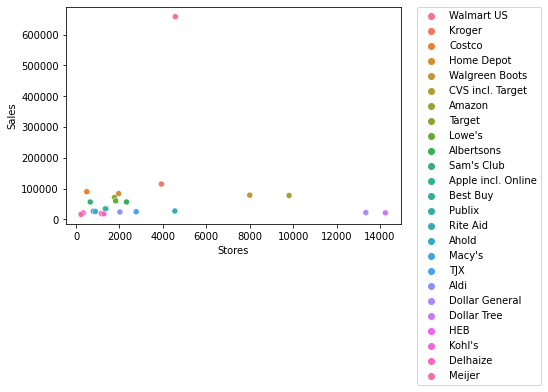

In [18]:
sns.scatterplot(data=df,x='Stores',y='Sales',hue='Company')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

A considerar:
* La correlación entre la cantidad de tiendas con el total de ventas es muy baja, así aumente la cantidad de tiendas, el número de ventas casí no pasa de 200000.
* Una compañía que tenga más tiendas no necesariamente tiene más ventas, por ejemplo Meijer tiene más de 14 mil y sus ventas no llegan a 100.000 millones de doláres, y Walmart US sobre pasa los 600.000 millones de ventas y no llega a 5 mil tiendas. 


A considerar:
* Al quitar a Walmar US se nota que la correlación entre la cantidad de tiendas con las ventas es baja. 

<AxesSubplot:>

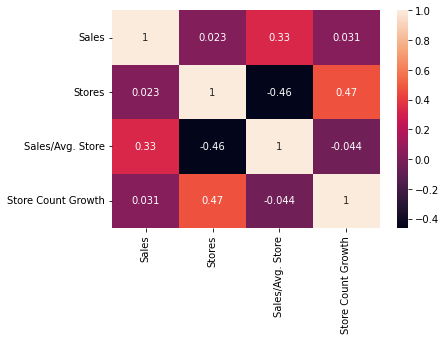

In [19]:
sns.heatmap(df_without_walmart.corr(),annot=True)

A considerar:
* En la primera gráfica de scatter plot se muestra que la relación entre la cantidad de tiendas y las ventas es baja, así aumenten la cantidad de tiendas, las ventas no suben. 
* En el mapa de calor al pasar las correlaciones, la correlación entre las tiendas y las ventas es de <b>0.023</b>, un valor de correlación positiva muy cercano a cero, lo cual indica que aunque subes la cantidad de tiendas, las ventas suben poco. 

### 5. ¿Cuál es el rango que existe entre las ventas?

In [20]:
min_sales = df["Sales"].quantile(q=0)
max_sales = df["Sales"].quantile(q=1)
mean_sales = df["Sales"].mean()
q1_sales = df['Sales'].quantile(q=0.25)
q3_sales = df['Sales'].quantile(q=0.75)
iqr_sales = q3_sales - q1_sales 
range_sales = max_sales - min_sales
print("Min Sales: ",min_sales)
print("Q1 Sales: ",q1_sales)
print("Mean Sales: ",mean_sales)
print("Q3 Sales:",q3_sales)
print("Max Sales: ",max_sales)
print("Range Sales: ",range_sales)
print("IQR:",iqr_sales)

Min Sales:  16592.0
Q1 Sales:  24402.0
Mean Sales:  71063.08
Q3 Sales: 71687.0
Max Sales:  658119.0
Range Sales:  641527.0
IQR: 47285.0


/home/ernesto/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

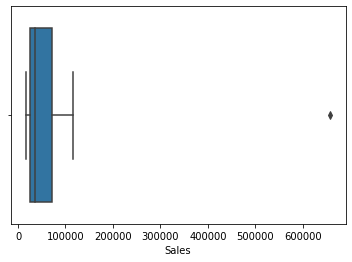

In [21]:
sns.boxplot(df['Sales'])

In [22]:
minlimit_sales = q1_sales - 1.5*iqr_sales
maxlimit_sales = q1_sales + 1.5*iqr_sales
print('Rango para detección de outliers: {}, {}'.format(minlimit_sales,maxlimit_sales))

Rango para detección de outliers: -46525.5, 95329.5


A considerar:
* El mínimo de ventas es de <b>16.592 millones de doláres</b>.
* El primer cuartil (25% de ventas) es de <b>24.402 millones de doláres<b>
* El promedio de ventas es de <b>71.063,08 millones de doláres</b>
* El tercer cuartil (75% de ventas) es de <b>71.687 millones de doláres</b>
* El maximo de ventas es de <b>658.119 millones de doláres</b>.
* El rango para detección de outliers es de 0 doláres a <b>95.329,5 millones de doláres</b>
* El range valor mínimo de ventas y máximo de ventas de <b>641.527 millones de doláres</b>

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

In [23]:
df_stores_sorted = df.sort_values('Stores', ascending=0)
df_stores_sorted

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
14,Rite Aid,27486,4553.0,6.025649,-0.003720,Drug Stores
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
17,TJX,25012,2770.0,9.369545,0.078241,Apparel
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery
18,Aldi,24402,2021.0,12.715998,0.112273,Grocery


In [24]:
x = df_stores_sorted['Company'][0:5]
y = df_stores_sorted['Stores'][0:5]

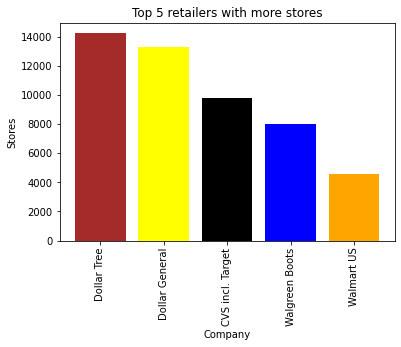

In [25]:
plt.bar(x, y,color=['brown', 'yellow', 'black', 'blue', 'orange'])
plt.title('Top 5 retailers with more stores')
plt.xlabel('Company')
plt.ylabel('Stores')
plt.xticks(rotation='vertical') #Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.show()

Aspectos a destacar:

* La compañía que tiene más tiendas es <b>Dollar Tree con 14250 tiendas</b>, le sigue de cerca Dollar General con13350, la que tiene menos tiendas de las 5 principales es <b>Walmart US con 4574</b>. 
* La relación entre la cantidad de tiendas con sus ventas es muy baja, por que Walmar US que tiene del top 5 la menor cantidad de tiendas, es la que tiene la mayor cantidad de ventas y Dollar Tree que tiene la mayor cantidad de tiendas por su cantidad de ventas no aparece en el top 5 por ventas.
* Del top 5 de mayor cantidad de ventas sólo aparece <b>Walmart US </b>
* Las empresas con más tiendas son: 
    * Dollar Tree
    * Dollar General
    * CVS incl. Target
    * Walgreen Boots
    * Walmart US

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

In [26]:
df_categories = df_sorted.groupby('Category').sum()
df_categories_sorted = df_categories.sort_values('Sales', ascending=0)

df_categories_sorted

,Sales,Stores,Sales/Avg. Store,Store Count Growth
Category,,,,
Supercenters,745919,6577.0,180.370496,0.087294
Grocery,297164,12026.0,207.678590,0.157494
Drug Stores,184202,22368.0,24.662535,0.241432
Home Improvement,144287,3793.0,76.047670,0.019520
Warehouse Club,90048,495.0,187.795620,0.066810
Electronic/Mail Order,71687,0.0,0.000000,0.000000
Warehouse Clubs,56828,655.0,87.293395,0.012365
Department Stores,45088,2058.0,46.795602,0.088850
Dollar Stores,43698,27600.0,3.332804,0.212039


/home/ernesto/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

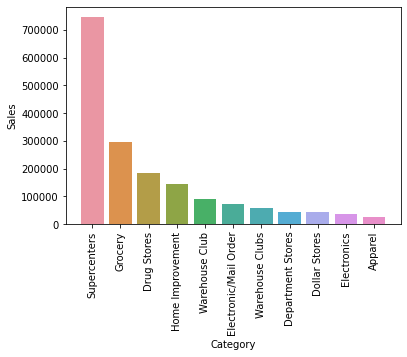

In [27]:
x = df_categories_sorted.index
y = df_categories_sorted["Sales"]
sns.barplot(x,y,data=df_sorted,ci = False)
plt.xticks(rotation=90)
plt.plot()

Aspectos a destacar:
* La categoría con la mayor cantidad de ventas es Supercenters con  <b>745.919 millones de doláres</b>.

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

In [28]:
df_sales_stores = df.sort_values('Sales/Avg. Store', ascending=0)

df_sales_stores

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs
24,Meijer,16592,231.0,74.738739,0.084507,Supercenters
21,HEB,21384,323.0,66.825000,0.018927,Grocery
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
15,Ahold,26903,794.0,34.446863,0.033854,Grocery
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
16,Macy's,26028,889.0,30.442105,0.082826,Department Stores


/home/ernesto/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

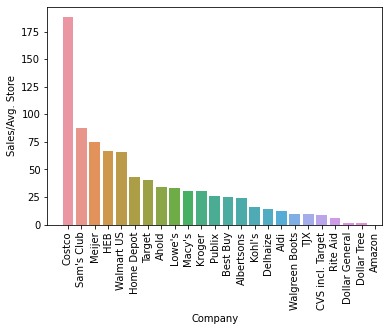

In [29]:
x = df_sales_stores["Company"]
y = df_sales_stores["Sales/Avg. Store"]
sns.barplot(x,y,data=df_sorted,ci = False)
plt.xticks(rotation=90)
plt.plot()

A considerar:
* La compañía que genera más ventas en relación a sus tiendas físicas es Costco con <b> 187,795 millones de dólares por tienda<b>.

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

In [30]:
df_online = df_sorted[df_sorted["Stores"].isna()]
df_online

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
11,Apple incl. Online,37664,NaN,NaN,NaN,NaN


Aspectos a destacar:
* <b>Amazon con ventas de 71687</b> y <b>Apple incl. Online con ventas de 37664</b> son las compañías que venden exclusivamente online ya que no tienen tiendas físicas.
* <b>Amazon</b> sobre sale ya que se encuentra de septimo en el top 10 de países con más ventas. 
* <b>Apple incl. Online</b> se encuentra en la posición 11 de las compañías que más ventas tienen. 

## III. Tus propias preguntas

### 10. Pregunta - ¿Qué empresa tiene la mayor tasa de crecimiento de tiendas?

In [31]:
df_sorted = df.sort_values('Store Count Growth', ascending=0)
df_sorted

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores
18,Aldi,24402,2021.0,12.715998,0.112273,Grocery
24,Meijer,16592,231.0,74.738739,0.084507,Supercenters
16,Macy's,26028,889.0,30.442105,0.082826,Department Stores
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores
17,TJX,25012,2770.0,9.369545,0.078241,Apparel
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
13,Publix,34408,1351.0,25.997733,0.042438,Grocery


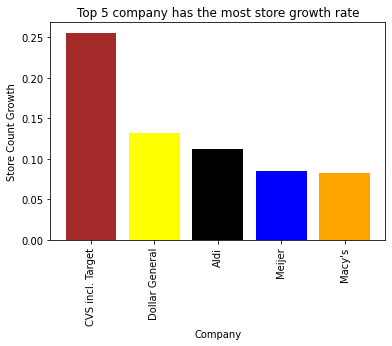

In [32]:
x = df_sorted["Company"][0:5]
y = df_sorted['Store Count Growth'][0:5]
plt.bar(x, y,color=['brown', 'yellow', 'black', 'blue', 'orange'])
plt.title('Top 5 company has the most store growth rate')
plt.xlabel('Company')
plt.ylabel('Store Count Growth')
plt.xticks(rotation='vertical') #Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.show()

A considerar:
* La empresa con la mayor tasa de crecimiento en tiendas es CVS incl. Target con una tasa de crecimiento de <b>0.2556621881</b>

### 11. Pregunta Cuales tiendas de la categoría Groceries tienen más ventas?

In [33]:
df_grocery_sorted_sales = df[df["Category"] == "Grocery"].sort_values('Sales', ascending=0)
df_grocery_sorted_sales

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery
13,Publix,34408,1351.0,25.997733,0.042438,Grocery
15,Ahold,26903,794.0,34.446863,0.033854,Grocery
18,Aldi,24402,2021.0,12.715998,0.112273,Grocery
21,HEB,21384,323.0,66.825000,0.018927,Grocery
23,Delhaize,18201,1280.0,13.783415,-0.059515,Grocery


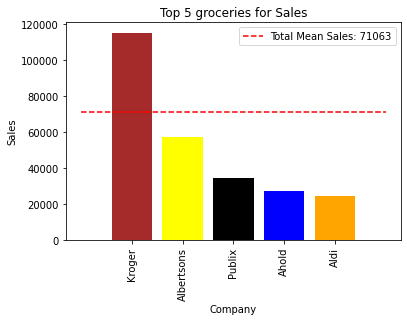

In [34]:
x = df_grocery_sorted_sales['Company'][0:5]
y = df_grocery_sorted_sales['Sales'][0:5]
plt.bar(x, y,color=['brown', 'yellow', 'black', 'blue', 'orange'])
plt.title('Top 5 groceries for Sales')
plt.xlabel('Company')
plt.ylabel('Sales')
plt.xticks(rotation='vertical') 
plt.hlines(mean_total_sales, xmin=-1, xmax=5,color='red', linestyles='dashed',label=f'Total Mean Sales: {int(mean_total_sales)}')
plt.legend()
plt.show()

A considerar:
* La empresa de la categoría grocery con mayor ventas es <b>Kroger</b> con ventas de <b>115.037 millones de doláres</b>
* <b>Kroger</b> es la única empresa de la categoría Grocery, que sobre pasa el promedio de ventas totales.

### 12. Pregunta Cuales de  los retailers de la categoría Groceries tienen más tiendas?

In [35]:
df_grocery_sorted_stores = df[df["Category"] == "Grocery"].sort_values('Stores', ascending=0)
df_grocery_sorted_stores

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery
18,Aldi,24402,2021.0,12.715998,0.112273,Grocery
13,Publix,34408,1351.0,25.997733,0.042438,Grocery
23,Delhaize,18201,1280.0,13.783415,-0.059515,Grocery
15,Ahold,26903,794.0,34.446863,0.033854,Grocery
21,HEB,21384,323.0,66.825000,0.018927,Grocery


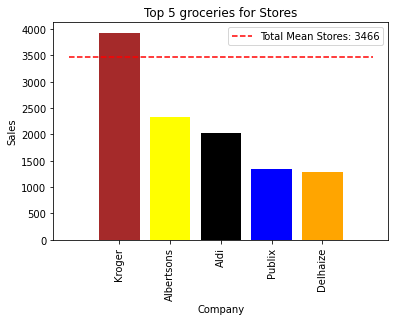

In [36]:
x = df_grocery_sorted_stores['Company'][0:5]
y = df_grocery_sorted_stores['Stores'][0:5]
plt.bar(x, y,color=['brown', 'yellow', 'black', 'blue', 'orange'])
plt.title('Top 5 groceries for Stores')
plt.xlabel('Company')
plt.ylabel('Sales')
plt.xticks(rotation='vertical') 
plt.hlines(mean_total_stores, xmin=-1, xmax=5,color='red', linestyles='dashed',label=f'Total Mean Stores: {int(mean_total_stores)}')
plt.legend()
plt.show()

A considerar: 
* La empresa de la categoría grocery que más tiendas tiene es <b>Kroger</b> con <b>3.931 tiendas</b>.
* <b>Kroger</b> es la única empresa de la categoría Grocery que sobre pasa el promedio total de tiendas.
* De la categoría Grocery <b>Kroger</b> es la que tiene más ventas y más tiendas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=788310bd-a15b-4ead-9d6a-f274a33801f5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>